In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from ISLP import load_data, confusion_table
from ISLP.svm import plot as plot_svm

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
roc_curve = RocCurveDisplay.from_estimator

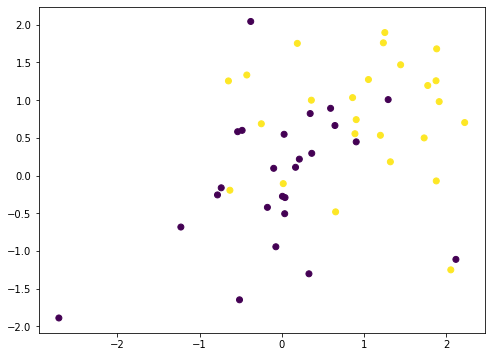

In [3]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

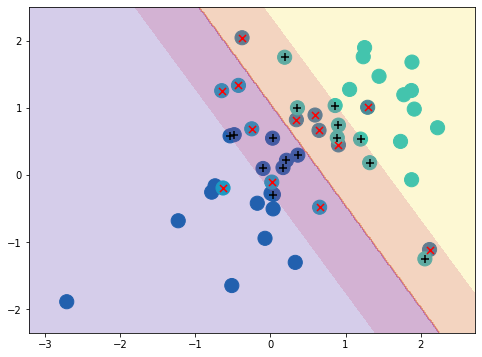

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X, y, svm_linear, ax=ax)

In [6]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [7]:
grid = GridSearchCV(svm_linear, param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}, refit=True, cv=5, scoring='accuracy')
grid.fit(X, y)
grid.best_estimator_, grid.best_params_

(SVC(C=1, kernel='linear'), {'C': 1})

In [8]:
grid.cv_results_

{'mean_fit_time': array([0.00080056, 0.00060058, 0.00060058, 0.00080075, 0.00080061,
        0.00100121, 0.00360312]),
 'std_fit_time': array([4.00280992e-04, 4.90368586e-04, 4.90368586e-04, 4.00376331e-04,
        4.00304809e-04, 4.42200589e-07, 1.96155222e-03]),
 'mean_score_time': array([0.00040026, 0.0004005 , 0.0004003 , 0.00020032, 0.00020022,
        0.00020003, 0.00020013]),
 'std_score_time': array([0.00049021, 0.0004905 , 0.00049027, 0.00040064, 0.00040045,
        0.00040007, 0.00040026]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7]),
 'split1_test_score': array([0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8]),
 'split2_test_score': array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8

In [9]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test==1] += 1

In [10]:
best_ = grid.best_estimator_
y_hat = best_.predict(X_test)
confusion_table(y_hat, y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [28]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1] * 150 + [2] * 50)
X, y

(array([[ 1.48423241e+00,  3.65811332e+00],
        [ 1.70273740e+00,  6.16622880e-01],
        [ 1.71879550e+00,  2.36002051e+00],
        [ 1.76560799e+00,  4.26552060e+00],
        [ 2.85538665e+00,  3.73127944e+00],
        [ 3.38588544e+00,  3.14215322e-01],
        [ 1.62224139e+00, -7.28485687e-01],
        [ 1.35360326e+00,  3.11510426e+00],
        [ 1.15678890e+00,  1.36331156e+00],
        [ 2.32613417e+00,  2.78731650e+00],
        [ 1.64368662e+00,  1.74418782e+00],
        [ 2.80898170e+00,  2.25405868e+00],
        [ 1.71471323e+00,  2.31450349e+00],
        [ 2.07612151e+00,  2.25463292e+00],
        [ 4.00123118e+00,  1.69479208e+00],
        [ 1.46023714e+00,  3.41363079e+00],
        [ 1.29429936e+00,  3.71988948e+00],
        [ 1.80580219e+00,  2.07383952e+00],
        [ 2.73362828e+00,  3.21310970e+00],
        [ 2.99699865e+00,  1.79636464e+00],
        [ 1.63357116e+00,  2.34747265e+00],
        [ 2.13471907e+00,  1.35772689e+00],
        [ 2.41072807e+00,  2.994

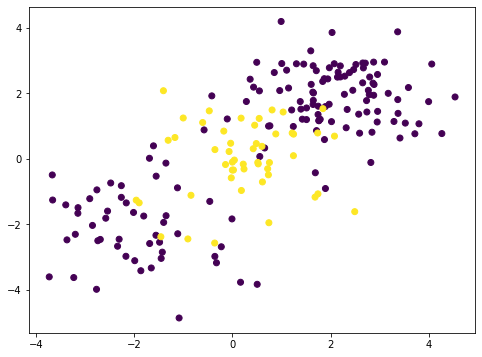

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [17]:
svm_rbf = SVC(kernel='rbf', gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

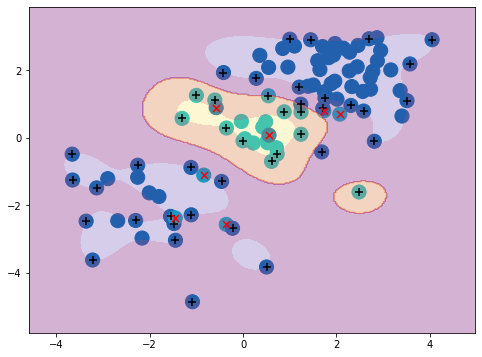

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_svm(X_train, y_train, svm_rbf, ax=ax)

In [19]:
grid = GridSearchCV(svm_rbf, param_grid={'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.5, 1, 2, 3, 4]}, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_estimator_, grid.best_params_

(SVC(C=1, gamma=1), {'C': 1, 'gamma': 1})

In [20]:
best_svm_ = grid.best_estimator_
y_hat = best_svm_.predict(X_test)
confusion_table(y_hat, y_test)

Truth,1,2
Predicted,,
1,70,11
2,5,14


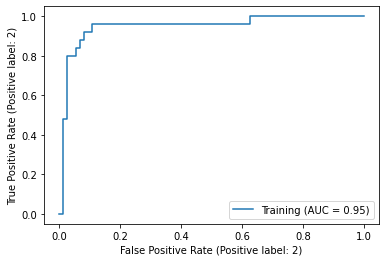

In [21]:
roc_curve(best_svm_, X_train, y_train, name='Training')

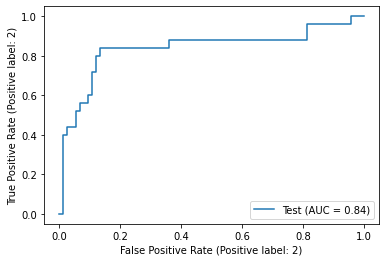

In [22]:
roc_curve(best_svm_, X_test, y_test, name='Test')

In [29]:
rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0] * 50])
X[y==0, 1] += 2

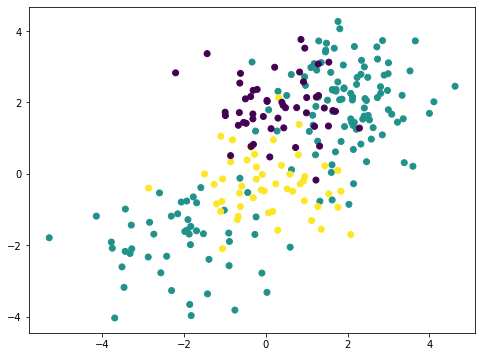

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y)

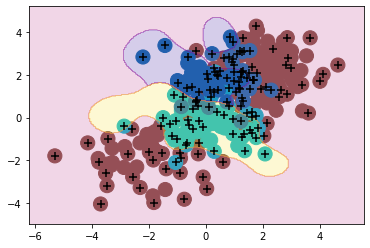

In [31]:
svm_rbf_3 = SVC(kernel='rbf', C=10, gamma=1, decision_function_shape='ovo')
svm_rbf_3.fit(X, y)
plot_svm(X, y, svm_rbf_3)

In [32]:
Khan = load_data('Khan')

In [34]:
khan_svm = SVC(kernel='linear', C=10)
khan_svm.fit(Khan['xtrain'], Khan['ytrain'])
y_hat = khan_svm.predict(Khan['xtest'])
confusion_table(y_hat, Khan['ytest'])

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
